In [1]:
import torch.nn.functional as F
import torch
import torch.nn as nn

In [2]:
class PeakDetectionModel(nn.Module):
    def __init__(self):
        super(PeakDetectionModel, self).__init__()

        # 1D Convolution layers
        self.conv1 = nn.Conv1d(1, 32, kernel_size=9, stride=1, padding=4)
        self.conv2 = nn.Conv1d(33, 32, kernel_size=7, stride=1, padding=3)
        self.conv3 = nn.Conv1d(33, 32, kernel_size=5, stride=1, padding=2)
        self.conv4 = nn.Conv1d(33, 32, kernel_size=3, stride=1, padding=1)

        # Batch normalization layers
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.batch_norm2 = nn.BatchNorm1d(32)
        self.batch_norm3 = nn.BatchNorm1d(32)
        self.batch_norm4 = nn.BatchNorm1d(32)

        # Output convolutional layer with 1 channel
        self.output_conv = nn.Conv1d(129, 1, kernel_size=1, stride=1)

    def forward(self, x):
        # Input shape: (batch_size, 1, sequence_length)

        # Convolutional layers with batch normalization and relu activation
        x1 = F.relu(self.batch_norm1(self.conv1(x)))
        x2 = F.relu(self.batch_norm2(self.conv2(torch.cat([x, x1], dim=1))))
        x3 = F.relu(self.batch_norm3(self.conv3(torch.cat([x, x2], dim=1))))
        x4 = F.relu(self.batch_norm4(self.conv4(torch.cat([x, x3], dim=1))))

        # Apply output convolutional layer with 1 channel
        out = torch.sigmoid(self.output_conv(
            torch.cat([x, x1, x2, x3, x4], dim=1)))

        return out[:, -1, :]  # Squeeze the channel dimension for a 1D output


# Create an instance of the model
model = PeakDetectionModel()

In [3]:
state_dict = torch.load("iGluSnFR3_100Hz.pt")
model.load_state_dict(state_dict)

<All keys matched successfully>

In [4]:
scripted_model = torch.jit.script(model)

scripted_model.save("iGluSnFR3_100Hz_scripted.pt")

# Restart the kernel to make sure that model definition isn't existant

In [1]:
import torch

In [2]:
sample = torch.tensor([1.294,0.651,0.776,1.343,0.606,1.32,0.622,1.307,0.96,1.144,0.875,1.199,0.749,1.214,1.051,1.086,1.525,0.792,1.124,0.516,0.808,1.196,0.658,0.994,0.707,1.041,0.717,1.448,0.978,1.284,1.092,0.604,2.029,1.059,1.333,0.993,1.468,1.172,1.065,0.885,0.988,1.443,1.149,1.603,1.054,1.563,1.549,0.973,0.792,0.676,0.991,0.613,2.022,1.248,1.226,0.886,0.991,1.366,0.549,0.633,0.942,1.382,0.744,1.257,1.068,0.971,1.294,0.916,1.358,1.188,2.279,1.49,1.948,0.999,1.047,1.333,1.242,1.943,0.909,1.687,0.796,1.289,0.748,1.14,0.884,0.69,1.223,1.259,1.518,0.821,1.559,1.134,1.105,1.243,1.153,1.309,1.242,1.73,1.215,1.772,1.277,1.677,1.129,1.126,1.537,0.932,1.894,1.017,1.387,1.462,1.684,1.468,1.239,1.444,0.506,1.845,0.744,1.476,0.967,1.25,1.313,0.769,1.748,1.367,1.542,0.777,1.299,0.831,1.011,1.664,])

In [3]:
scripted_model = torch.jit.load("iGluSnFR3_100Hz_scripted.pt")

output = scripted_model(sample.reshape(1, 1, sample.shape[0]))

print(output)

tensor([[8.1160e-08, 2.7748e-07, 9.9237e-08, 4.5913e-06, 4.0886e-07, 6.0924e-06,
         4.2040e-06, 1.0056e-04, 6.6453e-06, 2.2274e-05, 5.8381e-06, 5.2416e-06,
         3.1156e-06, 5.8286e-05, 2.7645e-05, 2.6873e-05, 1.5861e-05, 8.4091e-06,
         1.4212e-06, 4.5077e-07, 1.7453e-06, 1.0485e-06, 4.4857e-06, 4.0091e-06,
         2.7494e-06, 2.6675e-05, 1.2992e-05, 1.0808e-04, 9.4110e-05, 2.3660e-02,
         5.0133e-04, 1.3214e-03, 8.1618e-01, 7.2209e-04, 3.1414e-03, 8.0574e-04,
         3.2895e-03, 1.1319e-03, 2.6066e-03, 3.1690e-03, 1.6869e-03, 1.0941e-01,
         1.9736e-03, 3.0575e-01, 1.7013e-03, 5.2732e-03, 1.2517e-03, 5.1828e-04,
         2.1444e-04, 5.2309e-03, 1.1194e-03, 6.0773e-04, 9.5700e-01, 1.8344e-04,
         7.1451e-04, 1.0981e-04, 3.3564e-04, 1.5110e-05, 1.6008e-05, 4.5685e-04,
         7.0459e-06, 3.9264e-05, 2.5668e-05, 3.5062e-03, 4.7174e-04, 1.1183e-03,
         1.8408e-03, 3.1994e-03, 1.9356e-03, 6.0436e-03, 9.1476e-01, 2.0379e-03,
         9.8987e-03, 4.8133e

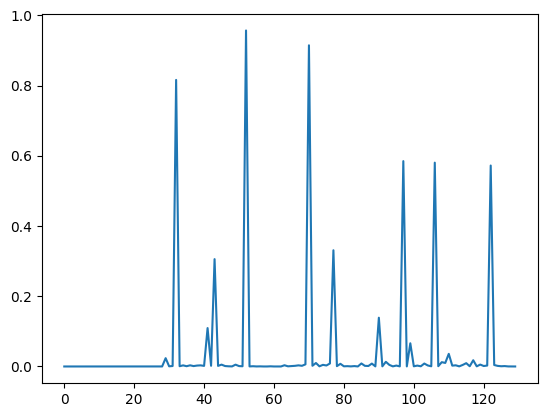

In [7]:
import matplotlib.pyplot as plt
plt.plot(output[0].detach())